In [15]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    

In [16]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,791.078125,12.953125,992.109375
Andhra Pradesh,112389.616505,1303.854369,144683.936893
Arunachal Pradesh,1233.298913,3.211957,1807.875000
Assam,32840.709677,130.284946,42665.365591
Bihar,39399.836735,241.668367,47596.515306
Cases being reassigned to states,0.000000,0.000000,5759.416667
Chandigarh,1334.366834,25.316583,1964.643216
Chhattisgarh,9567.336683,128.241206,15904.934673
Dadar Nagar Haveli,0.378378,0.000000,5.027027


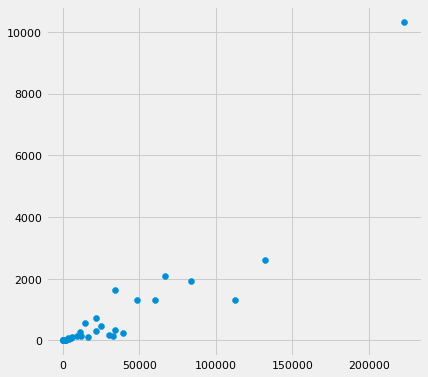

In [17]:
# Import the data

df = pd.read_csv("./Downloads/covid_19_india.csv")
df2 = df.groupby(['State/UnionTerritory']).agg({'Cured': 'mean', 'Deaths': 'mean', 'Confirmed': 'mean'})
df2.size

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1])
#plt.scatter(df2.columns[0],df2.columns[1]) 
df2.size
df2.head(n=126)
 

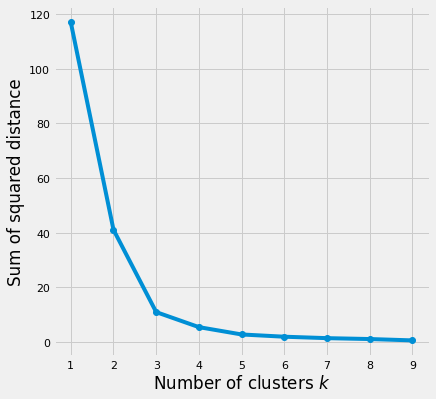

In [18]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

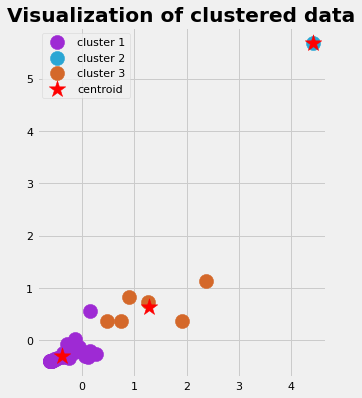

In [19]:
# Standardize the data
X_std = StandardScaler().fit_transform(df2)

# Run local implementation of kmeans
km = Kmeans(n_clusters=3, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],marker='o',s=200,
            c='#9E2AD4', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],marker='o',s=200,
            c='#2AA6D4', label='cluster 2')
plt.scatter(X_std[km.labels == 2, 0], X_std[km.labels == 2, 1],marker='o',s=200,
            c='#D4682A', label='cluster 3')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')

plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');



In [20]:

df2['Labels']=km.labels
df2.head(n=216)

,Cured,Deaths,Confirmed,Labels
State/UnionTerritory,,,,
Andaman and Nicobar Islands,791.078125,12.953125,992.109375,0
Andhra Pradesh,112389.616505,1303.854369,144683.936893,2
Arunachal Pradesh,1233.298913,3.211957,1807.875000,0
Assam,32840.709677,130.284946,42665.365591,0
Bihar,39399.836735,241.668367,47596.515306,0
Cases being reassigned to states,0.000000,0.000000,5759.416667,0
Chandigarh,1334.366834,25.316583,1964.643216,0
Chhattisgarh,9567.336683,128.241206,15904.934673,0
Dadar Nagar Haveli,0.378378,0.000000,5.027027,0


In [21]:
pd.Series(km.labels).value_counts()

0    32
2     6
1     1
dtype: int64

In [22]:
for i in range(0,39):
    if(km.labels[i]==2):
        print(df2.index[i])

Andhra Pradesh
Delhi
Karnataka
Tamil Nadu
Uttar Pradesh
West Bengal


In [32]:
for i in range(0,39):
    if(km.labels[i]==2):
        print(df2.row(i))

AttributeError: 'DataFrame' object has no attribute 'row'

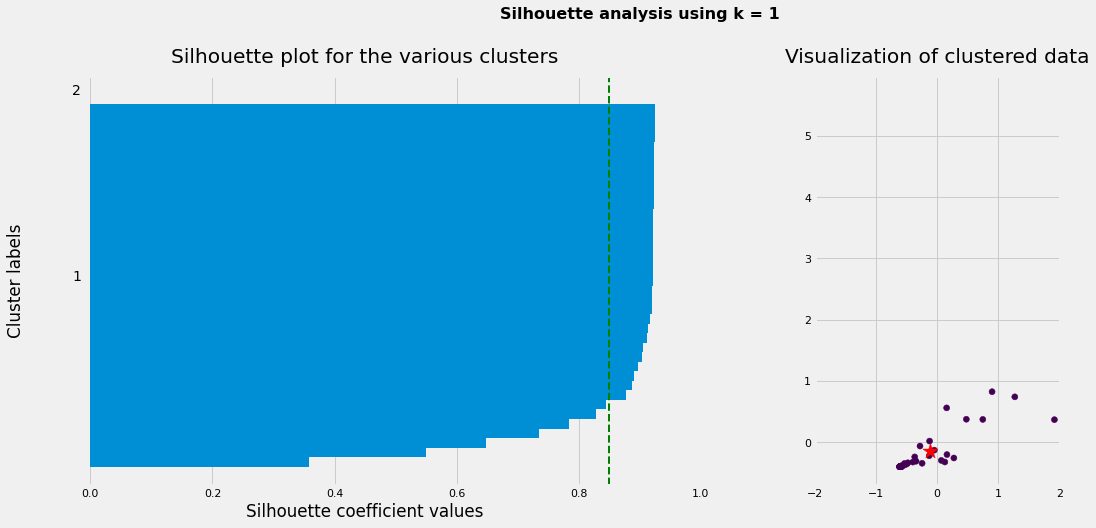

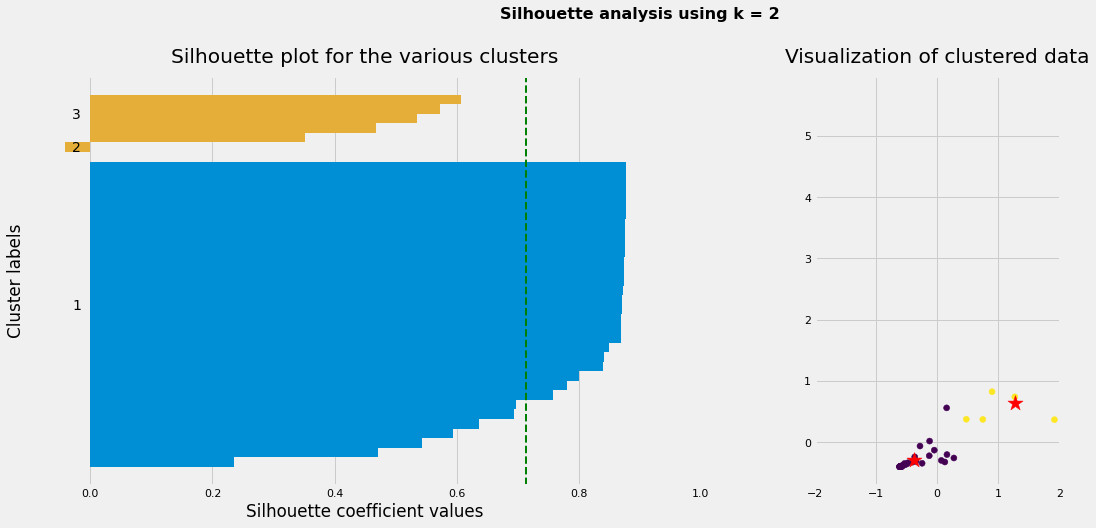

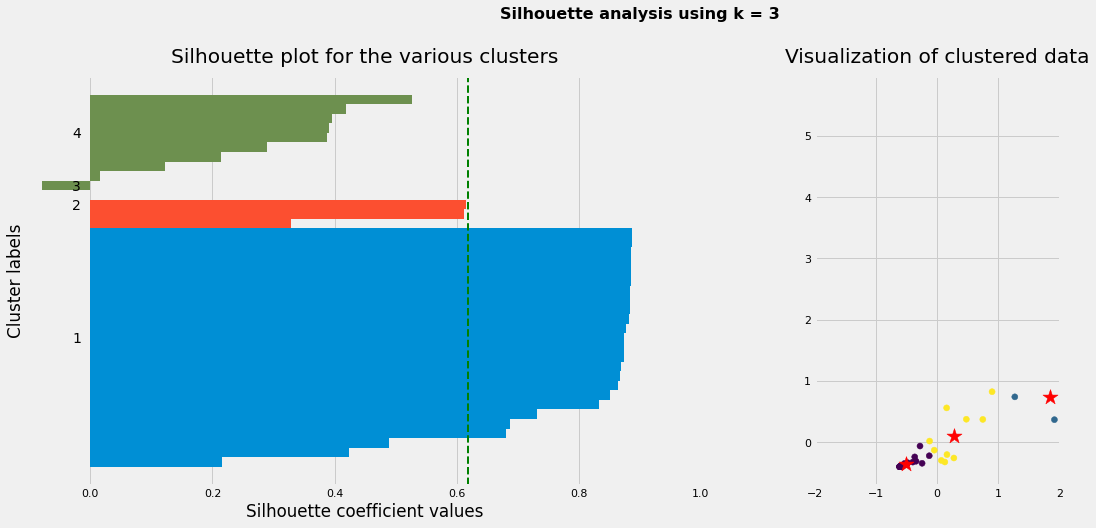

In [13]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    #ax2.set_xlabel('Eruption time in mins')
    #ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k-1}',
                 fontsize=16, fontweight='semibold', y=1.05);

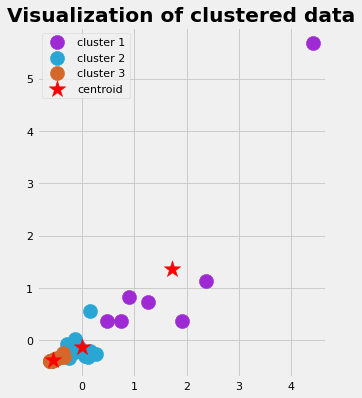

In [30]:
# Standardize the data
#X_std = StandardScaler().fit_transform(df2)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_std=scaler.fit_transform(df2)
# Run local implementation of kmeans
km = Kmeans(n_clusters=3, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],marker='o',s=200,
            c='#9E2AD4', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],marker='o',s=200,
            c='#2AA6D4', label='cluster 2')
plt.scatter(X_std[km.labels == 2, 0], X_std[km.labels == 2, 1],marker='o',s=200,
            c='#D4682A', label='cluster 3')
#plt.scatter(X_std[km.labels == 3, 0], X_std[km.labels == 3, 1],marker='o',s=200,
 #           c='#37D42A', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')

plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');



In [31]:
pd.Series(km.labels).value_counts()

2    22
1    10
0     7
dtype: int64